In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import shap
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_rows = 100

In [6]:
df = pd.read_csv('/Users/youssefalyakoob/Desktop/Kickstarter Project/Data/cleaned_data_v1.csv')

In [9]:
df.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category,campaign_duration_in_days
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art,30
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock,35
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art,25
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy,15
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels,12


In [10]:
cols_to_drop = ['blurb', 'created_at', 'deadline', 'launched_at']
df.drop(columns=cols_to_drop, inplace=True)

In [11]:
df.head()

,category,country,state,goal_usd,sub_category,campaign_duration_in_days
0,art,GB,failed,3404.17,conceptual art,30
1,music,US,successful,420.00,rock,35
2,art,US,successful,1600.00,conceptual art,25
3,crafts,US,successful,3000.00,diy,15
4,comics,US,successful,1.00,graphic novels,12


In [14]:
df['state'] = df['state'].map({'successful':1, 'failed':0})

In [15]:
df.head()

,category,country,state,goal_usd,sub_category,campaign_duration_in_days
0,art,GB,0,3404.17,conceptual art,30
1,music,US,1,420.00,rock,35
2,art,US,1,1600.00,conceptual art,25
3,crafts,US,1,3000.00,diy,15
4,comics,US,1,1.00,graphic novels,12


In [19]:
df = df.rename(columns={'campaign_duration_in_days':'campaign_duration', 
                  'goal_usd':'goal_in_usd'})

In [20]:
df.head()

,category,state,goal_in_usd,sub_category,campaign_duration
0,art,0,3404.17,conceptual art,30
1,music,1,420.00,rock,35
2,art,1,1600.00,conceptual art,25
3,crafts,1,3000.00,diy,15
4,comics,1,1.00,graphic novels,12


In [21]:
target = 'state'
y = df[target]
X = df.drop(columns=target)

In [22]:
X

,category,goal_in_usd,sub_category,campaign_duration
0,art,3404.17,conceptual art,30
1,music,420.00,rock,35
2,art,1600.00,conceptual art,25
3,crafts,3000.00,diy,15
4,comics,1.00,graphic novels,12
...,...,...,...,...
183669,food,8035.94,drinks,30
183670,publishing,2500.00,fiction,60
183671,design,10000.00,product design,31
183672,comics,1095.29,webcomics,40


In [24]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size = .30, random_state = 42)

In [25]:
X_train_1 = X_train.copy()
X_val_1 = X_val.copy()

In [26]:
# Isolated Columns
# Store up the Target Columsn for Label Encoding in Train and Val--- WE WILL PROCESS THESE COLUMNS--
# NOT BACK UPS
X_train_cat = X_train_1["category"]
X_train_sub_cat = X_train_1["sub_category"]
X_val_cat = X_val_1["category"]
X_val_sub_cat = X_val_1["sub_category"]

In [27]:
# ACTUAL BACKUPS OF THE TARGET COLUMNS
X_train_cat_backup = X_train_1["category"]
X_train_sub_cat_backup = X_train_1["sub_category"]
X_val_cat_backup = X_val_1["category"]
X_val_sub_cat_backup = X_val_1["sub_category"]

In [28]:
print('baseline accuracy', y.value_counts(normalize=True).max())

baseline accuracy 0.5859893071420016


In [29]:
X_train_cat = X_train_1["category"]
X_train_sub_cat = X_train_1["sub_category"]
X_val_cat = X_val_1["category"]
X_val_sub_cat = X_val_1["sub_category"]

In [32]:
Encoder = LabelEncoder()

In [33]:

# Label Encode X_train_cat

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X_train_cat:
        if X_train_cat.dtype == object:
            X_train_cat = le.fit_transform(X_train_cat)
        else:
            pass

In [34]:
# Label Encode X_train_sub_cat 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in  X_train_sub_cat:
        if  X_train_sub_cat.dtype == object:
             X_train_sub_cat = le.fit_transform(X_train_sub_cat)
        else:
            pass

In [35]:

# X_val_cat

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X_val_cat:
        if X_val_cat.dtype == object:
            X_val_cat = le.fit_transform(X_val_cat)
        else:
            pass

In [36]:

# X_val_sub_cat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column_name in X_val_sub_cat:
        if X_val_sub_cat.dtype == object:
            X_val_sub_cat = le.fit_transform(X_val_sub_cat)
        else:
            pass

In [37]:

X_train["category"] = X_train_cat 
X_val["category"] = X_val_cat 
X_train["sub_category"] = X_train_sub_cat
X_val["sub_category"] = X_val_sub_cat

In [38]:
X_train["category"]

156953     0
16117      6
89758      4
74979     13
36238     10
          ..
119879    10
103694    12
131932     7
146867     6
121958     6
Name: category, Length: 128571, dtype: int64

In [39]:
X_train["sub_category"]

156953     61
16117      82
89758      21
74979     119
36238      22
         ... 
119879     63
103694    144
131932     36
146867    128
121958    140
Name: sub_category, Length: 128571, dtype: int64

In [40]:

X_val["sub_category"]

116844     35
611        32
67876     124
137233    110
50389      28
         ... 
98964     143
154164    141
66823      84
70912      53
177325     34
Name: sub_category, Length: 55103, dtype: int64

In [41]:
X_val["category"]

116844     6
611        2
67876      8
137233     7
50389     10
          ..
98964     10
154164     2
66823     12
70912     13
177325     6
Name: category, Length: 55103, dtype: int64

In [42]:
len(X_val["category"]) == len(X_val_1["category"])

True

In [43]:

len(X_val["sub_category"]) == len(X_val_1["sub_category"])

True

In [45]:
# Here are the string columns
X_train_cat_backup 
X_train_sub_cat_backup
X_val_cat_backup 
X_val_sub_cat_backup

116844             drama
611                  diy
67876     tabletop games
137233       restaurants
50389     country & folk
               ...      
98964        world music
154164       woodworking
66823         nonfiction
70912            gadgets
177325       documentary
Name: sub_category, Length: 55103, dtype: object

In [46]:
# Here are the number columns
X_train["category"] 
X_val["category"] 
X_train["sub_category"] 
X_val["sub_category"]

116844     35
611        32
67876     124
137233    110
50389      28
         ... 
98964     143
154164    141
66823      84
70912      53
177325     34
Name: sub_category, Length: 55103, dtype: int64

In [47]:
X_val_cat_string = X_val_cat_backup 
X_val_sub_cat_string = X_val_sub_cat_backup

In [48]:
X_val_cat_backup

116844    film & video
611             crafts
67876            games
137233            food
50389            music
              ...     
98964            music
154164          crafts
66823       publishing
70912       technology
177325    film & video
Name: category, Length: 55103, dtype: object

In [49]:

X_val["category"] 
X_val["sub_category"]

116844     35
611        32
67876     124
137233    110
50389      28
         ... 
98964     143
154164    141
66823      84
70912      53
177325     34
Name: sub_category, Length: 55103, dtype: int64

In [50]:
df_val_match_sub = pd.concat([X_val_sub_cat_string, X_val["sub_category"]], axis = 1)

In [51]:
df_val_match_sub = pd.DataFrame(df_val_match_sub )

In [52]:
df_tuple_sub_index = df_val_match_sub.set_index(["sub_category"])

In [53]:
type(list(df_tuple_sub_index.index))

list

In [64]:
df_val_match_sub.head()

,sub_category,sub_category
116844,drama,35
611,diy,32
67876,tabletop games,124
137233,restaurants,110
50389,country & folk,28


In [54]:
sub_cat_labels = list(set(list(df_tuple_sub_index.index)))

In [55]:
sub_cat_labels

[('punk', 103),
 ("farmer's markets", 45),
 ('action', 3),
 ('indie rock', 63),
 ('apps', 8),
 ('footwear', 52),
 ('academic', 1),
 ('crochet', 30),
 ('quilts', 105),
 ('country & folk', 28),
 ('embroidery', 38),
 ('narrative film', 82),
 ('anthologies', 6),
 ('couture', 29),
 ('kids', 68),
 ('software', 119),
 ('ceramics', 17),
 ('woodworking', 141),
 ('web', 138),
 ('product design', 101),
 ('musical', 81),
 ('architecture', 9),
 ('restaurants', 110),
 ('shorts', 116),
 ('toys', 129),
 ('farms', 46),
 ('installations', 64),
 ('chiptune', 20),
 ('romance', 113),
 ("children's books", 18),
 ('rock', 112),
 ('drama', 35),
 ('nonfiction', 84),
 ('family', 43),
 ('webseries', 140),
 ('childrenswear', 19),
 ('fantasy', 44),
 ('webcomics', 139),
 ('interactive design', 65),
 ('knitting', 69),
 ('video art', 134),
 ('horror', 60),
 ('plays', 95),
 ('sculpture', 115),
 ('animals', 4),
 ('typography', 131),
 ('world music', 143),
 ('comedy', 23),
 ('residencies', 109),
 ('social practice', 118

In [56]:
df_val_match_cat = pd.concat([X_val_cat_backup , X_val["category"]], axis = 1)

In [57]:
df_val_match_cat = df_val_match_cat.set_index("category")

In [58]:
set(df_val_match_cat.index)

{('art', 0),
 ('comics', 1),
 ('crafts', 2),
 ('dance', 3),
 ('design', 4),
 ('fashion', 5),
 ('film & video', 6),
 ('food', 7),
 ('games', 8),
 ('journalism', 9),
 ('music', 10),
 ('photography', 11),
 ('publishing', 12),
 ('technology', 13),
 ('theater', 14)}

In [59]:
#out of the box random forest model 
model_xgb = make_pipeline(
    XGBClassifier(random_state=42,n_jobs=-1)
)

model_xgb.fit(X_train,y_train)

[16:58:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [60]:
print('Training Accuracy:', model_xgb.score(X_train,y_train))
print('Validation Accuracy:', model_xgb.score(X_val, y_val))

Training Accuracy: 0.7936548677384481
Validation Accuracy: 0.7794493947697948


In [65]:
model2_xgb = XGBClassifier()
learning_rates = [0.1,0.3,0.5,0.7,0.9,1]
n_estimators = randint(50,500)
max_depth = [3,5,10,15,20,None]
min_child_weights = [1,2,5,10,20]
subsamples = [0.5,0.7,0.8,1]
grid = dict(learning_rate = learning_rates, n_estimators = n_estimators, min_child_weight = min_child_weights, subsample = subsamples)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = RandomizedSearchCV(estimator=model2_xgb, param_distributions=grid, n_jobs = -1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

[17:45:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
grid_search.best_params_

{'learning_rate': 0.1,
 'min_child_weight': 5,
 'n_estimators': 340,
 'subsample': 0.7}

In [67]:
print('Training Accuracy:', grid_search.score(X_train, y_train))
print('Validation Accuracy:', grid_search.score(X_val,y_val))

Training Accuracy: 0.7948837607236469
Validation Accuracy: 0.7787597771446201


In [68]:
bestimator_xgb = grid_search.best_estimator_

In [69]:
perm_imp = permutation_importance(bestimator_xgb, X_val, y_val, random_state=42)

In [70]:
data = {'imp_mean':perm_imp['importances_mean'],
        'imp_std':perm_imp['importances_std']}
df_perm = pd.DataFrame(data, index=X_val.columns).sort_values(by='imp_mean')

Text(0.5, 0, 'Permutation Importance for Tuned XGB Classifier')

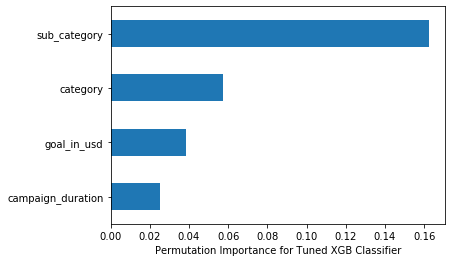

In [71]:
df_perm['imp_mean'].tail(10).plot(kind='barh')
plt.xlabel('Permutation Importance for Tuned XGB Classifier')

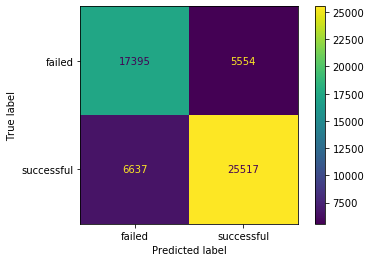

In [72]:
plot_confusion_matrix(bestimator_xgb, X_val,y_val, display_labels=['failed', 'successful'], values_format='.0f')

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa002d8d700>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa004a22640>})

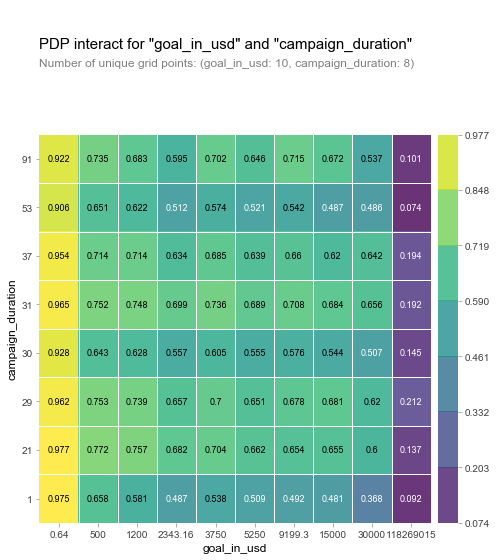

In [74]:
features = ['goal_in_usd', 'campaign_duration']
interact = pdp_interact(bestimator_xgb,
                        dataset = X_val,
                        model_features = X.columns,
                        features=features)

pdp_interact_plot(interact, plot_type='grid', feature_names=features)

In [75]:
#saving best model
import pickle
saved_model_xgb = pickle.dumps(bestimator_xgb)

In [76]:
import joblib
joblib_file = 'joblib_bestimator_XGB.pkl'
joblib.dump(bestimator_xgb,'xgb_model')

['xgb_model']

In [ ]:
def predict(category, campaign_duration,
            goal_in_usd, sub_category):
    # backers_count, category, campaign_duration,
    # goal_in_usd, blurb_length, sub_category, usd_pledged,
    df = pd.DataFrame(columns=["category", "campaign_duration",
                               "goal_in_usd", "sub_category"],
                      data=[[category, campaign_duration,
                             goal_in_usd, sub_category]])
    y_pred = model.predict(df)[0]
    y_pred_prob = model.predict_proba(df)[0] * 100
    if y_pred == 1:
        return "You Are {}% Likely to Succeed.".format(round(y_pred_prob[1], 2))
    else:
        return "You Are {}% Likely to Fail.".format(round(y_pred_prob[1], 2))

In [131]:
df3 = pd.DataFrame(columns=["category", "goal_in_usd",
                            "sub_category", "campaign_duration"],
                      data=[[13, 8200.71,
                             119, 55]])

In [112]:
df3.head()

,category,campaign_duration,goal_in_usd,sub_category
0,2,100,1000,16


In [132]:
bestimator_xgb.predict(df3)


array([0])

In [139]:
bestimator_xgb.predict_proba(df3)[0]*100

array([75.880974, 24.119024], dtype=float32)

In [140]:
y_pred_prob = bestimator_xgb.predict_proba(df3)[0]*100

In [144]:
np.round(y_pred_prob[0],2)

75.88

In [121]:
model_xgb.predict(df3)

array([1])

In [123]:
X_train

,category,goal_in_usd,sub_category,campaign_duration
156953,0,300.00,61,7
16117,6,85000.00,82,45
89758,4,15000.00,21,28
74979,13,8200.71,119,55
36238,10,500.00,22,15
...,...,...,...,...
119879,10,4500.00,63,30
103694,12,800.00,144,30
131932,7,1500.00,36,60
146867,6,25000.00,128,30


In [130]:
y_train

156953    1
16117     1
89758     1
74979     0
36238     1
         ..
119879    1
103694    0
131932    0
146867    1
121958    1
Name: state, Length: 128571, dtype: int64